In [1]:
from keras.applications.densenet import DenseNet121
dense_net_conv = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
29089792/29084464 [==============================] - 5s 0us/step


In [2]:
# Freeze the layers except the last 4 layers
for layer in dense_net_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in dense_net_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1cd4a17ba8> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f1cc4616438> False
<keras.layers.convolutional.Conv2D object at 0x7f1cc4616860> False
<keras.layers.normalization.BatchNormalization object at 0x7f1cc459da20> False
<keras.layers.core.Activation object at 0x7f1cc459def0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f1cc459dd30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1cc45c9400> False
<keras.layers.normalization.BatchNormalization object at 0x7f1cc4581080> False
<keras.layers.core.Activation object at 0x7f1cbf4adf98> False
<keras.layers.convolutional.Conv2D object at 0x7f1cbf45bf60> False
<keras.layers.normalization.BatchNormalization object at 0x7f1cbf44a390> False
<keras.layers.core.Activation object at 0x7f1cbf408550> False
<keras.layers.convolutional.Conv2D object at 0x7f1cbf363390> False
<keras.layers.merge.Concatenate object at 0x7f1cbf37b390> False
<keras.layers.normalization.

In [6]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import models
from keras import layers
from keras import optimizers
from keras.optimizers import adamax
import os
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 15
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10FineTune_trained_model1.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def swish(x):
    return K.sigmoid(x) * x


# Create the model
model = models.Sequential()
 
# Add the densenet convolutional base model
model.add(dense_net_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation=swish))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(512, activation=swish))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.adamax(lr=0.0001)

# Let's train the model using Adamax
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 434s 9ms/step - loss: 2.0252 - acc: 0.2794 - val_loss: 2.8627 - val_acc: 0.3431
Epoch 2/15
50000/50000 [==============================] - 410s 8ms/step - loss: 1.6280 - acc: 0.4273 - val_loss: 3.0979 - val_acc: 0.3887
Epoch 3/15
50000/50000 [==============================] - 411s 8ms/step - loss: 1.5041 - acc: 0.4671 - val_loss: 2.9615 - val_acc: 0.4175
Epoch 4/15
50000/50000 [==============================] - 410s 8ms/step - loss: 1.4271 - acc: 0.4964 - val_loss: 2.9451 - val_acc: 0.4261
Epoch 5/15
50000/50000 [==============================] - 409s 8ms/step - loss: 1.3768 - acc: 0.5143 - val_loss: 2.8913 - val_acc: 0.4345
Epoch 6/15
50000/50000 [==============================] - 414s 8ms/step - loss: 1.3317 - acc: 0.5300 - val_loss: 2.7862 - val_acc: 0.4445
Epoch 7/15
50000/50000 [=========================

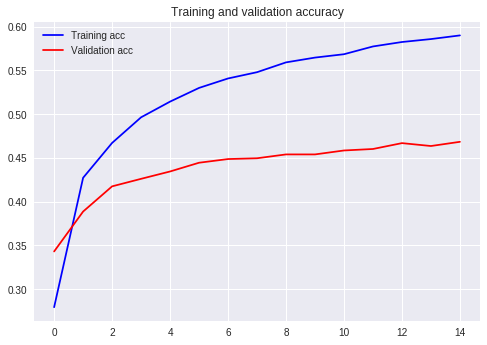

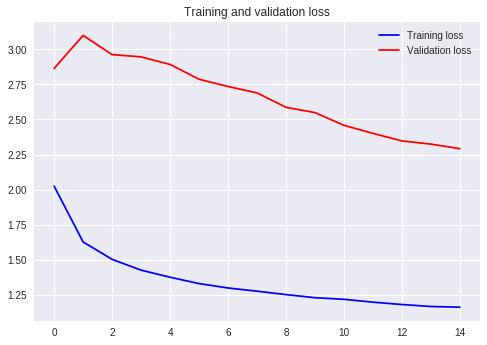

In [7]:
import matplotlib.pyplot as plt

acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()